Naive bayes: good starting point for classification
    
linear regression is good for regression: can be fit very quickly, interpretable
    
y = ax + b

a is the slope
b is the intercept

multidimensional linear model

y = a0 + a1 x1 + a2 x2 + ...

it is like fitting plane to a point in three dimensional, fitting a hyper-plane to a point in higher dimension 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

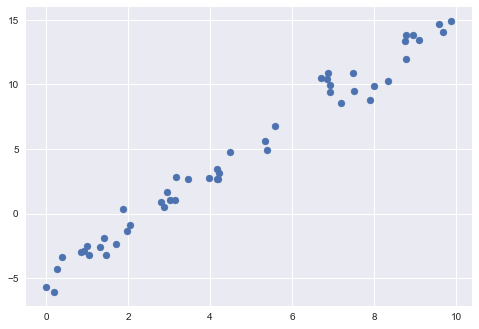

In [3]:
rng  = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x - 5+rng.randn(50)
plt.scatter(x,y)

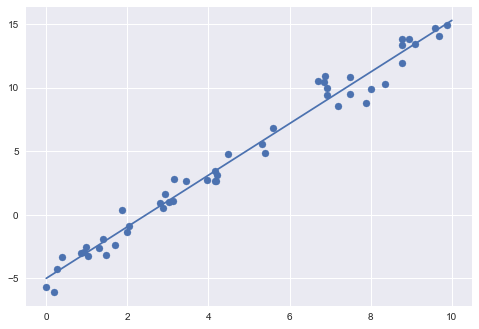

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

In [10]:
model.coef_

array([ 2.02720881])

In [11]:
model.intercept_

-4.9985770855532019

In [12]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

In [13]:
model.fit(X,y)
model.intercept_

0.50000000000001443

In [14]:
model.coef_

array([ 1.5, -2. ,  1. ])

In [15]:
X[:10]

array([[  4.17022005e+00,   7.20324493e+00,   1.14374817e-03],
       [  3.02332573e+00,   1.46755891e+00,   9.23385948e-01],
       [  1.86260211e+00,   3.45560727e+00,   3.96767474e+00],
       [  5.38816734e+00,   4.19194514e+00,   6.85219500e+00],
       [  2.04452250e+00,   8.78117436e+00,   2.73875932e-01],
       [  6.70467510e+00,   4.17304802e+00,   5.58689828e+00],
       [  1.40386939e+00,   1.98101489e+00,   8.00744569e+00],
       [  9.68261576e+00,   3.13424178e+00,   6.92322616e+00],
       [  8.76389152e+00,   8.94606664e+00,   8.50442114e-01],
       [  3.90547832e-01,   1.69830420e+00,   8.78142503e+00]])

In [16]:
[1.5, -2., 1.]

[1.5, -2.0, 1.0]

In [17]:
np.dot(X[0], [1.5, -2., 1.])

-8.1500160501311019

In [18]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [20]:
x.shape

(3,)

In [21]:
x[:, None]

array([[2],
       [3],
       [4]])

In [25]:
x[:, np.newaxis]
# it returns the same thing

array([[2],
       [3],
       [4]])

In [26]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [53]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [54]:
np.sin(np.pi/6)

0.49999999999999994

In [55]:
np.pi

3.141592653589793

In [56]:
poly_model.fit(x[:, None], y)
yfit = poly_model.predict(xfit[:, None])

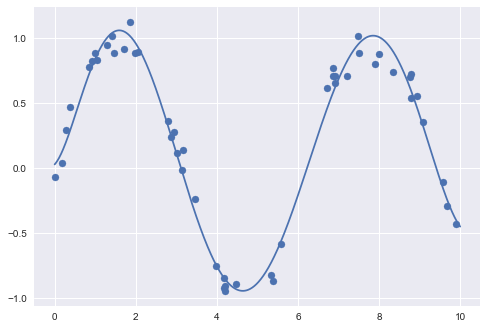

In [58]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

Basis Function makes linear regression more flexible

if it is too many, overfitting (focus more on noise)



In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

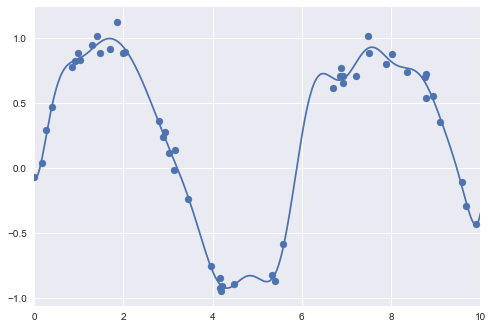

In [62]:
gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

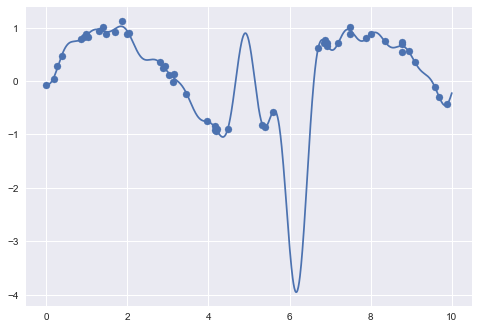

In [63]:
model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

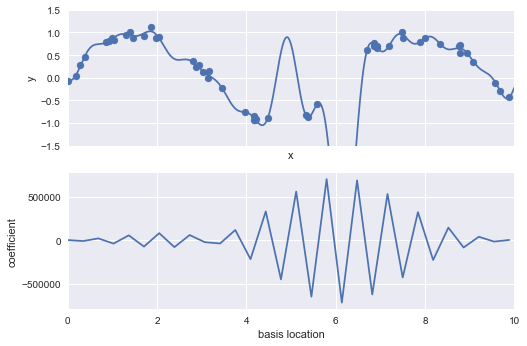

In [65]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',
    xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

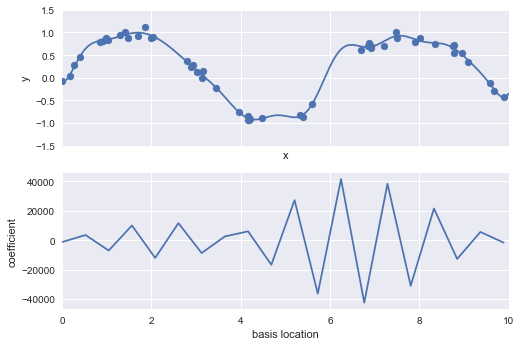

In [67]:
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
basis_plot(gauss_model)

In [68]:
# REGULATION
from sklearn.linear_model import Ridge

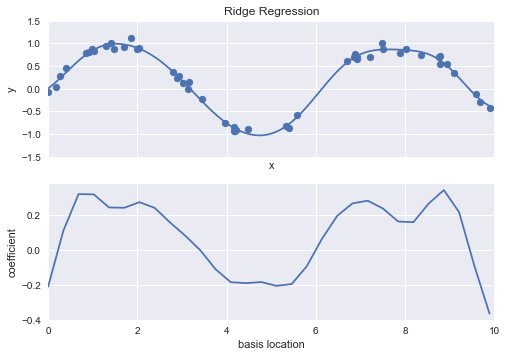

In [69]:
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

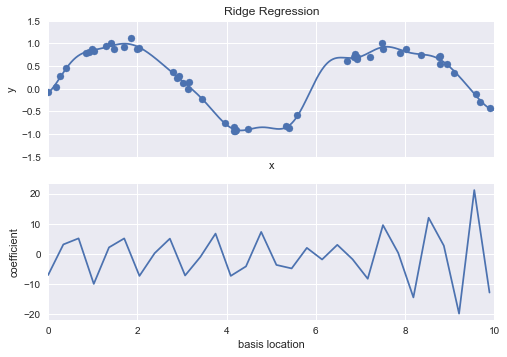

In [72]:
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.000001))
basis_plot(model, title='Ridge Regression')

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


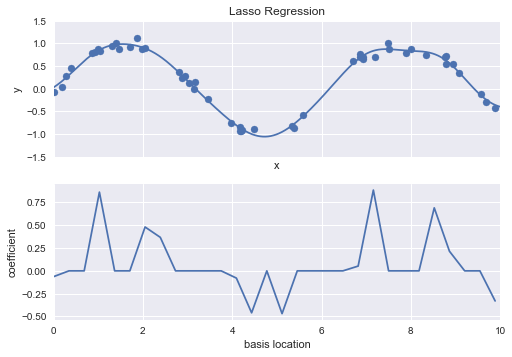

In [74]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

# EXAMPLE: PREDICTING BICYCLE TRAFFIC

In [82]:
import pandas as pd
counts = pd.read_csv('FremontHourly.csv', index_col = 'Date', parse_dates = True)

In [90]:
counts.head()

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0


In [91]:
weather = pd.read_csv('1105726.csv', index_col='DATE', parse_dates=True)

In [92]:
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,...,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT22,WT22_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,4.1,",,X",0.0,",,X,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,7.3,",,X",0.0,",,X,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,6.5,",,X",0.0,",,X,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,5.7,",,X",0.0,",,X,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,5.1,",,X",0.0,",,X,2400",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
daily = counts.resample('d', how='sum')
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [96]:
daily.head()

,Total
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0


In [102]:
(daily.index.dayofweek == 1)

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,

In [104]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [105]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

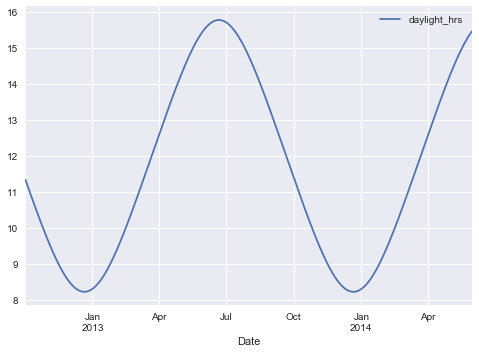

In [108]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
    * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
    
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

In [109]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [110]:
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [111]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,1.390,1,0.000000
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,1.335,1,0.002740
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,1.360,1,0.005479
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,1.530,1,0.008219
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,1.585,1,0.010959


In [112]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

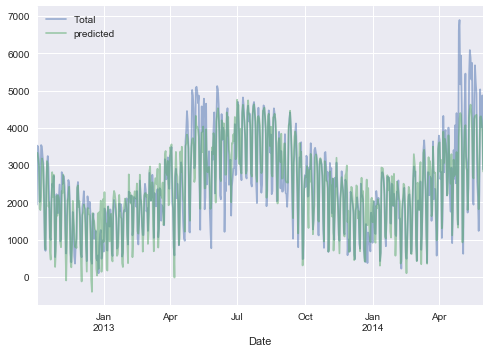

In [113]:
daily[['Total', 'predicted']].plot(alpha=0.5);